<a href="https://colab.research.google.com/github/Nannanpeng/Macro-I/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

In [2]:
from google.colab import drive
import os

# Below sets up the directory to save the results. use '#' to comment and run.  
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive/Macro_I")

Mounted at /content/drive


In [3]:
w0 = 1.
w1 = 1.
beta = 0.8
R = 1.25
eta = 1/2
sigmas = [1/2, 2, 10]

thetas = np.linspace(0, 1/2, 200)

def saving_eq(a, theta, sigma):
    left = eta*beta*R*( (w1 + theta + R*a)**(-sigma) + (w1 - theta + R*a)**(-sigma) )
    right = (w0 - a)**(-sigma)
    diff = left - right
    return diff

def saving_solver(theta, sigma):
    res = opt.root_scalar(saving_eq, args=(theta, sigma), bracket = (-2, 2), x0=0, x1=0.01, method='secant')
    if res.converged :
        return res.root
    else:
        return -100

In [4]:
savings = np.zeros((len(thetas), len(sigmas)))
for i, sigma in enumerate(sigmas):
    savings[:, i] = [ saving_solver(theta, sigma) for theta in thetas]

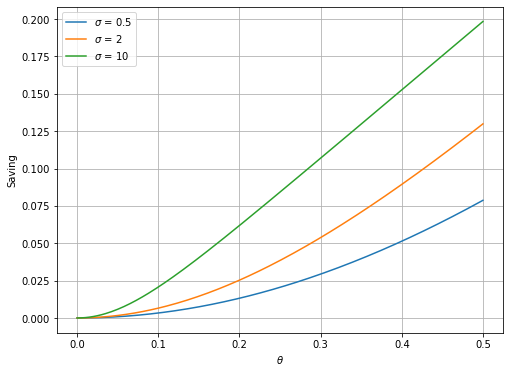

In [ ]:
plt.figure(figsize=(8, 6))
for sigma, saving in zip(sigmas, savings.T):
    plt.plot(thetas, saving, label=f"$\sigma$ = {sigma}")
plt.xlabel(r"$\theta$")
plt.ylabel('Saving')
plt.legend()
plt.grid();

plt.savefig('HW9_Q2.png', dpi=300)